In [1]:
import matplotlib.pylab as plt
from skimage import measure

from blockhead.util import (create_scale_space, 
                            default_synthetic,
                            populate_interval_tree)

from blockhead.visual import default_display

In [6]:
series = default_synthetic()
scale_space = create_scale_space(series, num_scales=50)
contours = measure.find_contours(scale_space["second"], 0)
interval_tree = populate_interval_tree(contours)

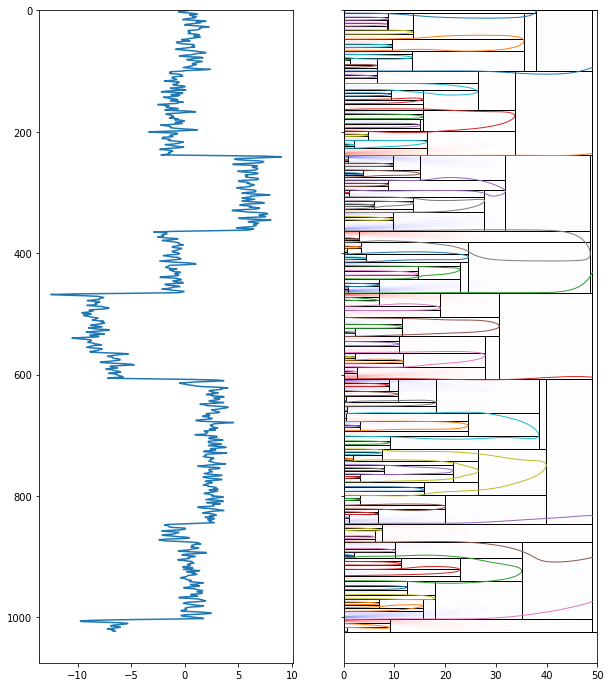

In [7]:
fig = default_display(series, scale_space, interval_tree)

### Demo, let's do something with the interval tree ....
We can apply functions to the intervals, we have a utility slice_by_scale which
applies a function to the data given the scale of the feature.

In [8]:
import numpy as np
from blockhead.util import slice_by_scale

threshold = 32
results = slice_by_scale(interval_tree['root'], threshold, series   , fn=np.mean)

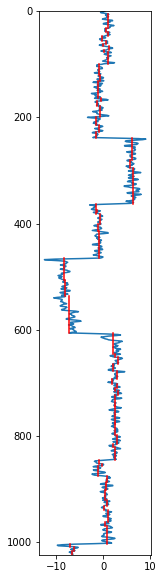

In [9]:
plt.figure(figsize=(2,10))
plt.plot(series, range(len(series)))
for result in results:
    node, data = result
    xmin, xmax = node.top_edge, node.bottom_edge
    ymin, ymax = data, data
    plt.plot([ymin, ymax], [xmin, xmax], '-r')
    plt.ylim([len(series), 0])